In [1]:
import numpy as np
import pandas as pd
from scipy import io
import matplotlib.pyplot as plt
import scanpy as sc
import anndata
import tarfile

In [2]:
cells_adata_path = "/srv/gstore/projects/p37785/EzPyzENACTApp_2025-06-29--17-57-49/ENACTApp_Visium_HD_Human_Lung_Cancer_post_Xenium_5K_Experiment2/chunks/weighted_by_area/celltypist_results/cells_adata.h5" # this is used only to match the set of genes measured in the dataset (SC dataset has larger pannel)
sc_reference_path = "/srv/GT/analysis/rdegottardi/data/SC_Lung_AC/adata.h5ad"


In [3]:
# Create AnnData object from the expression matrix, gene names, and cell names
adata = anndata.read_h5ad(sc_reference_path)

In [4]:
# Keep only genes present in adata_cells
adata_cells = sc.read_h5ad(cells_adata_path)
common_genes = adata.var_names.intersection(adata_cells.var_names)
adata = adata[:, common_genes].copy()


In [5]:
adata.obs

,full_hierarchical_labels,level_zero_labels,final_level_labels,final_level_softmax_prob,full_consistent_hierarchy,sample,patient,cell_type,cell_subtype,complexity,umap1,umap2,g1s_score,g2m_score,cell_cycle_phase,mp_top_score,mp_top,mp_assignment,source
cell_name,,,,,,,,,,,,,,,,,,,
AAACCCAAGACGACGT-1_1,Immune cell|Myeloid cell|Monocyte,Immune cell,Monocyte,0.953007,True,p018_N,p018,NaN,NaN,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
AAACCCAAGCACTCTA-1_2,Immune cell|Myeloid cell|Macrophage,Immune cell,Macrophage,0.955687,True,p018_N,p018,Macrophage,Alveolar_Macrophages1,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
AAACCCAAGCTGAAGC-1_3,Immune cell|Myeloid cell|Macrophage|Tissue res...,Immune cell,Alveolar macrophage,0.464053,False,p018_N,p018,Macrophage,Alveolar_Macrophages1,660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
AAACCCACAACTTGGT-1_4,Immune cell|Myeloid cell|Macrophage|Tissue res...,Immune cell,Alveolar macrophage,0.853826,True,p018_N,p018,Macrophage,Alveolar_Macrophages1,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
AAACCCACAAGAATAC-1_5,Immune cell|Myeloid cell|Macrophage|Tissue res...,Immune cell,Alveolar macrophage,0.977025,True,p018_N,p018,Macrophage,Alveolar_Macrophages1,1060,21.9664,15.7998,0.2190,0.0182,Not cycling,0.9347,Stress/HSP,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGAGTGTTA-1_120957,Immune cell|Myeloid cell|Monocyte,Immune cell,Monocyte,0.703395,True,p034_T,p034,Macrophage,CD14_Macrophages2,5310,-5.4142,8.9607,2.3204,0.4721,G1/S,1.4987,MYC/Mitochondria,NaN,Tumor
TTTGGTTGTCCCTCAT-1_120958,Immune cell|Lymphoid cell|T/NK cell|T cell|CD8...,Immune cell,GZMK+IL7R+ CD8 T cell,0.347634,True,p034_T,p034,T_cell,T_CD8_1,1648,-10.5220,-13.1721,0.2195,0.0711,Not cycling,0.8733,CD4 - Naive1,NaN,Tumor
TTTGTTGCAGTAGAAT-1_120959,Immune cell|Lymphoid cell|T/NK cell|T cell|CD8...,Immune cell,GZMK+IL7R+ CD8 T cell,0.462444,True,p034_T,p034,T_cell,T_CD8_1,1801,-9.5870,-12.2922,0.1340,0.1469,Not cycling,1.2951,CD8 - Unassigned2,NaN,Tumor


In [6]:

# QC statistics
print("AnnData shape (cells x genes):", adata.shape)
print("Total counts per cell (summary):")
print(pd.Series(adata.X.sum(axis=1).A1).describe())
print("Total counts per gene (summary):")
print(pd.Series(adata.X.sum(axis=0).A1).describe())
print("Number of nonzero genes per cell (summary):")
print(pd.Series((adata.X > 0).sum(axis=1).A1).describe())
print("Number of nonzero cells per gene (summary):")
print(pd.Series((adata.X > 0).sum(axis=0).A1).describe())


AnnData shape (cells x genes): (120961, 17899)
Total counts per cell (summary):
count    120961.000000
mean       5869.541150
std        8782.357284
min         461.000000
25%        1472.000000
50%        2497.000000
75%        6326.000000
max      269272.000000
dtype: float64
Total counts per gene (summary):
count    1.789900e+04
mean     3.966621e+04
std      3.574277e+05
min      0.000000e+00
25%      7.965000e+02
50%      7.697000e+03
75%      2.571650e+04
max      2.389205e+07
dtype: float64
Number of nonzero genes per cell (summary):
count    120961.000000
mean       1748.942419
std        1333.558837
min         372.000000
25%         838.000000
50%        1250.000000
75%        2209.000000
max        9797.000000
dtype: float64
Number of nonzero cells per gene (summary):
count     17899.000000
mean      11819.309682
std       16023.725941
min           0.000000
25%         598.000000
50%        5570.000000
75%       16952.000000
max      120500.000000
dtype: float64


In [ ]:
# Group cells by cell type and perform differential expression analysis to find marker genes
# We'll use scanpy's rank_genes_groups function for this

# Only use cells with a valid cell_type annotation
adata_valid = adata[adata.obs['cell_type'].notnull()].copy()

# Perform differential expression analysis
sc.pp.log1p(adata_valid)
sc.tl.rank_genes_groups(
    adata_valid,
    groupby='cell_type',
    method='wilcoxon',  # or 't-test', 'logreg'
    n_genes=20          # number of top marker genes to compute per group
)


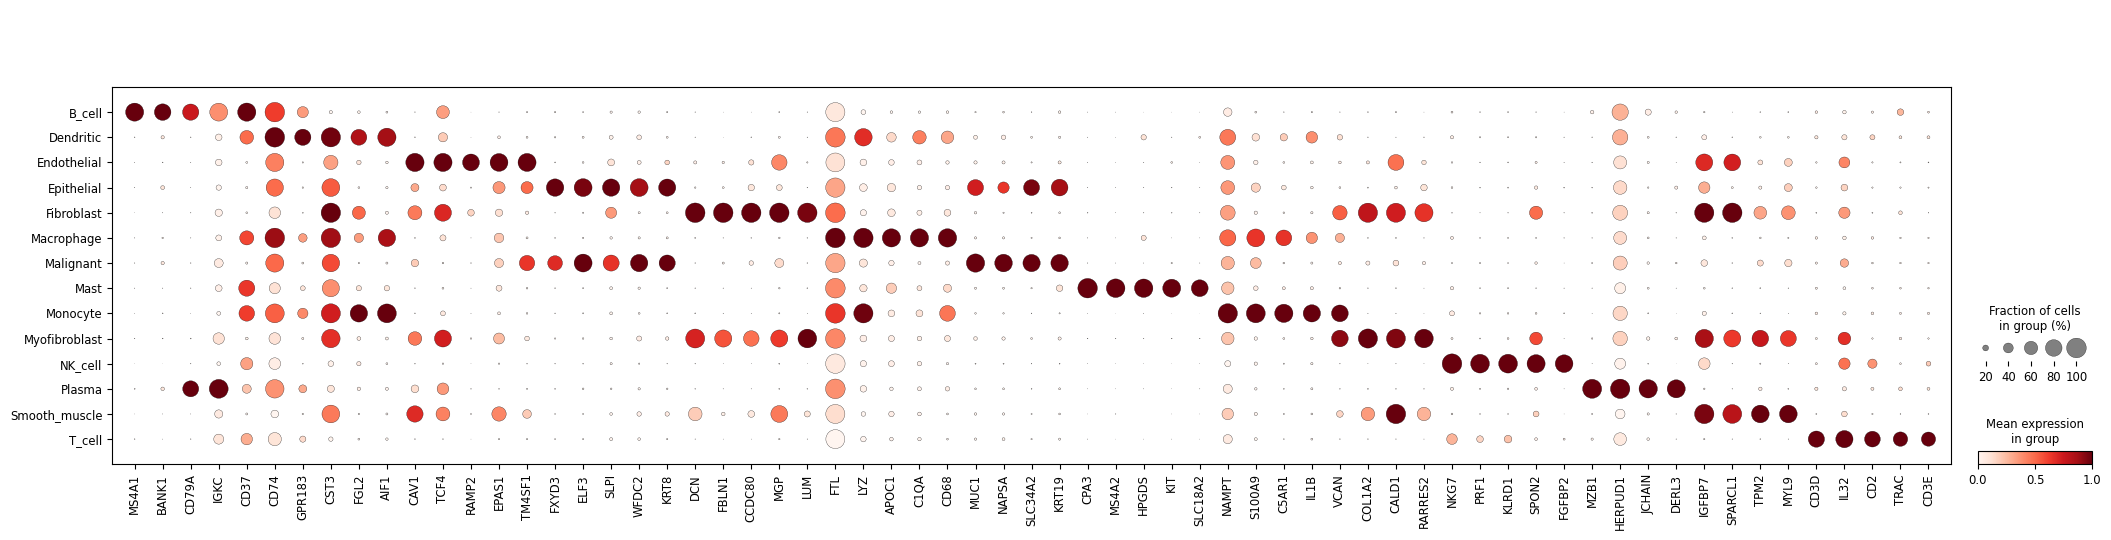

In [8]:
# Get top 5 marker genes per cell type from rank_genes_groups results
result = adata_valid.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_n = 5

# Collect top marker genes for each cell type
marker_genes = []
cell_labels = []
for group in groups:
    genes = result['names'][group][:top_n]
    marker_genes.extend(genes)
    cell_labels.extend([group] * top_n)

# Unique marker genes and cell types
marker_genes_unique = list(dict.fromkeys(marker_genes))
cell_types = list(groups)

# Create dotplot using scanpy
sc.pl.dotplot(
    adata_valid,
    var_names=marker_genes_unique,
    groupby='cell_type',
    categories_order=cell_types,
    standard_scale='var',
    show=True
)

In [9]:
# Find marker genes that meet the MECR criteria for all top 10 per cell type

MECR_genes = []

for cell_type in cell_types:
    top_genes = result['names'][cell_type]
    for gene in top_genes:
        if gene not in adata_valid.var_names:
            continue
        # Boolean mask for cells of this cell type
        mask_this = adata_valid.obs['cell_type'] == cell_type
        mask_other = adata_valid.obs['cell_type'] != cell_type

        # Expression (nonzero) in this cell type
        expr_this = adata_valid[mask_this, gene].X
        if hasattr(expr_this, "A1"):
            expr_this = (expr_this > 0).A1
        elif hasattr(expr_this, "toarray"):
            expr_this = (expr_this > 0).toarray().squeeze()
        else:
            expr_this = np.array(expr_this > 0).squeeze()
        frac_this = expr_this.sum() / mask_this.sum()

        # Expression (nonzero) in other cell types
        expr_other = adata_valid[mask_other, gene].X
        if hasattr(expr_other, "A1"):
            expr_other = (expr_other > 0).A1
        elif hasattr(expr_other, "toarray"):
            expr_other = (expr_other > 0).toarray().squeeze()
        else:
            expr_other = np.array(expr_other > 0).squeeze()
        frac_other = expr_other.sum() / mask_other.sum()

        if frac_this >= 0.25 and frac_other <= 0.01:
            MECR_genes.append(gene)

MECR_genes = list(dict.fromkeys(MECR_genes))  # Remove duplicates
print("MECR_genes:", MECR_genes)

MECR_genes: ['MS4A1', 'TNFRSF13B', 'VPREB3', 'BLK', 'PAX5', 'CD19', 'CD1C', 'CD1E', 'RAMP2', 'CLDN5', 'VWF', 'CDH5', 'CLEC14A', 'PTPRB', 'LDB2', 'EMCN', 'PCDH17', 'ADH1B', 'OGN', 'SFRP2', 'MFAP4', 'COL14A1', 'PODN', 'CPA3', 'MS4A2', 'KIT', 'SLC18A2', 'IL1RL1', 'HDC', 'RHEX', 'GCSAML', 'CALB2', 'TNFRSF17', 'FCRL5', 'TBX2']


In [10]:
# Binarize the expression matrix for marker genes (1 if expressed, 0 otherwise)


# Restrict to marker genes present in adata_valid
genes_in_adata = [g for g in MECR_genes if g in adata_valid.var_names]
X = adata_valid[:, genes_in_adata].X
X_bin = (X > 0)
X_bin = X_bin.astype(int)

# Compute coexpression matrix (gene x gene)
# Compute the sum of cells expressing each gene (across all cells)
gene_expr_sum = np.array(X_bin.sum(axis=0)).flatten()  # shape: (n_genes,)

# Create matrix where entry (i, j) = sum of cells expressing gene i + sum of cells expressing gene j
gene_expr_sum_matrix = gene_expr_sum[:, None] + gene_expr_sum[None, :]
coexpr = X_bin.T @ X_bin  # shape: (n_genes, n_genes)
# Subtract coexpression matrix from gene_expr_sum_matrix and normalize
norm_matrix = gene_expr_sum_matrix - coexpr
# Avoid division by zero
norm_matrix = np.where(norm_matrix == 0, 1, norm_matrix)
coexpr = coexpr / norm_matrix

coexpr = coexpr.toarray()



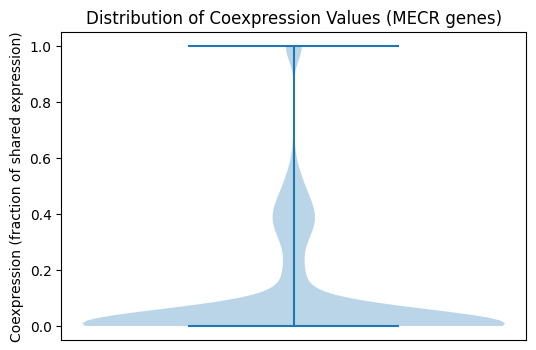

In [11]:
plt.figure(figsize=(6, 4))
plt.violinplot(coexpr.flatten())
plt.title("Distribution of Coexpression Values (MECR genes)")
plt.ylabel("Coexpression (fraction of shared expression)")
plt.xticks([])
plt.show()

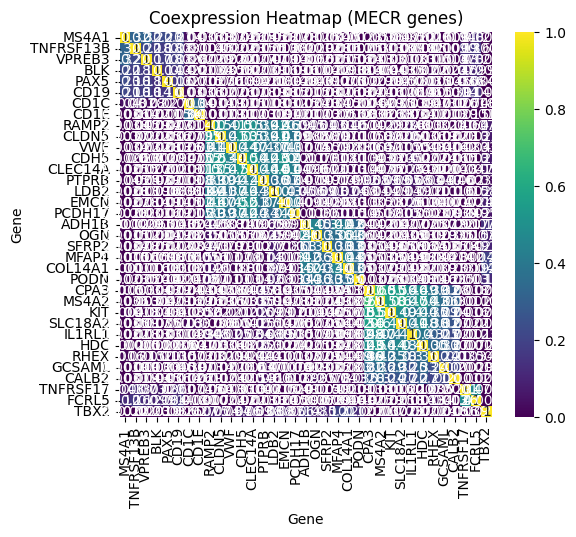

In [12]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(coexpr, annot=True, xticklabels=MECR_genes, yticklabels=MECR_genes, cmap="viridis")
plt.title("Coexpression Heatmap (MECR genes)")
plt.xlabel("Gene")
plt.ylabel("Gene")
plt.show()

In [13]:
# Build a mapping from gene to its marker cell types using result['names'][group]
gene_to_celltypes = {}
for group in groups:
    for gene in result['names'][group]:
        if gene not in gene_to_celltypes:
            gene_to_celltypes[gene] = set()
        gene_to_celltypes[gene].add(group)




In [14]:
# Generate gene pairs from MECR_genes that do not share any cell type

gene_pairs = []
for i, g1 in enumerate(MECR_genes):
    for j in range(i + 1, len(MECR_genes)):
        g2 = MECR_genes[j]
        # Get cell types for each gene, default to empty set if not present
        ct1 = gene_to_celltypes.get(g1, set())
        ct2 = gene_to_celltypes.get(g2, set())
        # Only keep pairs with no shared cell type
        if ct1.isdisjoint(ct2):
            gene_pairs.append((g1, g2))

In [15]:
len(gene_pairs)

491

In [16]:
gene_pairs

[('MS4A1', 'CD1C'),
 ('MS4A1', 'CD1E'),
 ('MS4A1', 'RAMP2'),
 ('MS4A1', 'CLDN5'),
 ('MS4A1', 'VWF'),
 ('MS4A1', 'CDH5'),
 ('MS4A1', 'CLEC14A'),
 ('MS4A1', 'PTPRB'),
 ('MS4A1', 'LDB2'),
 ('MS4A1', 'EMCN'),
 ('MS4A1', 'PCDH17'),
 ('MS4A1', 'ADH1B'),
 ('MS4A1', 'OGN'),
 ('MS4A1', 'SFRP2'),
 ('MS4A1', 'MFAP4'),
 ('MS4A1', 'COL14A1'),
 ('MS4A1', 'PODN'),
 ('MS4A1', 'CPA3'),
 ('MS4A1', 'MS4A2'),
 ('MS4A1', 'KIT'),
 ('MS4A1', 'SLC18A2'),
 ('MS4A1', 'IL1RL1'),
 ('MS4A1', 'HDC'),
 ('MS4A1', 'RHEX'),
 ('MS4A1', 'GCSAML'),
 ('MS4A1', 'CALB2'),
 ('MS4A1', 'TNFRSF17'),
 ('MS4A1', 'FCRL5'),
 ('MS4A1', 'TBX2'),
 ('TNFRSF13B', 'CD1C'),
 ('TNFRSF13B', 'CD1E'),
 ('TNFRSF13B', 'RAMP2'),
 ('TNFRSF13B', 'CLDN5'),
 ('TNFRSF13B', 'VWF'),
 ('TNFRSF13B', 'CDH5'),
 ('TNFRSF13B', 'CLEC14A'),
 ('TNFRSF13B', 'PTPRB'),
 ('TNFRSF13B', 'LDB2'),
 ('TNFRSF13B', 'EMCN'),
 ('TNFRSF13B', 'PCDH17'),
 ('TNFRSF13B', 'ADH1B'),
 ('TNFRSF13B', 'OGN'),
 ('TNFRSF13B', 'SFRP2'),
 ('TNFRSF13B', 'MFAP4'),
 ('TNFRSF13B', 'COL14A1'),


In [17]:
import csv

# Save the list of gene pairs to a CSV file

with open("gene_pairs.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Gene1", "Gene2"])
    writer.writerows(gene_pairs)